# Integrantes

*   Kaique Olegar Amaro dos Santos
*   Marcos Costa Antunes Afonso
*   Valéria Ribeiro dos Santos



# Importando as bibliotecas necessárias


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Função Degrau

Implementação da função degrau que será utilizada como função de ativação do neurônio.

In [ ]:
def stepFunction(x):
    return 1 if x >= 0 else 0


# Definição da classe Perceptron

Esta classe se refere a implementação do neurônio Perceptron de Rosenblatt. A biblioteca NumPy é utilizada para realizar operações rápidas e eficientes em vetores e matrizes, essenciais para o treinamento e uso adequado do Perceptron em problemas de classificação.

In [ ]:
class Perceptron():
    def __init__(self, weights_range, learning_rate, entry_size=2, activation_function=stepFunction):
        """
        Inicializa o Perceptron com os parâmetros fornecidos.

        Args:
            weights_range (tuple): Faixa de valores para inicialização dos pesos.
            learning_rate (float): Taxa de aprendizado.
            entry_size (int): Número de entradas (excluindo o bias).
            activation_function (function): Função de ativação a ser utilizada. Por padrão, é stepFunction
        """
        self.eta = learning_rate
        self.activation_function = activation_function

        self.weights = np.random.uniform(weights_range[0], weights_range[1], entry_size+1)


    def predict(self, x):
        """
        Realiza uma previsão com base nas entradas fornecidas.

        Args:
            x (numpy.ndarray): Vetor de entradas.

        Returns:
            self.activation_function(u) (int): Resultado da função de ativação em relação à combinação linear das entradas.
        """
        u = np.dot(x, self.weights)
        return self.activation_function(u)


    def fit(self, Dataframe, epochs):
        """
        Treina o Perceptron no conjunto de dados fornecido.

        Args:
            Dataframe (object): Objeto contendo os dados de treinamento.
            epochs (int): Número máximo de épocas para treinamento.
        """
        history = []
        for epoch in range(epochs):
            epoch_errors_count = 0

            random_indexes = np.random.permutation(Dataframe.length)

            Dataframe.x = Dataframe.x[random_indexes]
            Dataframe.y = Dataframe.y[random_indexes]

            for i in range(Dataframe.length):
                error = Dataframe.y[i] - self.predict(Dataframe.x[i])
                if error != 0:
                    epoch_errors_count += 1
                    self.weights += self.eta*error*Dataframe.x[i]

            history.append(epoch_errors_count)
            if epoch_errors_count == 0:
                break

    def solve(self, Dataframe):
        """
        Resolve o problema de classificação para o conjunto de dados fornecido.

        Args:
            Dataframe (object): Objeto contendo os dados para resolver o problema.

        Returns:
            history (list): Histórico de contagem de erros até convergência.
        """
        history = []
        epoch_errors_count = 1
        while epoch_errors_count != 0:
            epoch_errors_count = 0

            for i in range(Dataframe.length):

                error = Dataframe.y[i] - self.predict(Dataframe.x[i])
                if error != 0:
                    epoch_errors_count += 1
                    self.weights += self.eta*error*Dataframe.x[i]

            history.append(epoch_errors_count)

        return history

    def metrics(self, Dataframe):
        """
        Calcula métricas de desempenho do Perceptron no conjunto de dados fornecido.

        Args:
            Dataframe (object): Objeto contendo os dados de teste.

        Returns:
            merics (dict): Dicionário contendo as métricas de desempenho (acurácia, F1, precisão, recall e matriz de confusão).
        """
        y_true = Dataframe.y
        y_predict = np.array([self.predict(x) for x in Dataframe.x])

        metrics = {}

        metrics['accuracy'] = accuracy_score(y_true, y_predict)
        metrics['F1'] = f1_score(y_true, y_predict, average='weighted')
        metrics['precision'] = precision_score(y_true, y_predict, average='weighted')
        metrics['recall'] = recall_score(y_true, y_predict, average='weighted')
        metrics['confusionMatrix'] = confusion_matrix(y_true, y_predict)

        return metrics

# Implementação da classe Dataframe

Essa classe realiza a leitura dos dados de duas formas diferentes:

1. Se a variável `path` for declarada
  
  Quando a variável `path` é definida, utilizamos a função `fromfile` da biblioteca NumPy para converter o arquivo em um array `NumPy`. Em seguida, definimos o tamanho, x e y, respectivamente. Depois disso, iteramos sobre o array NumPy definido anteriormente e adicionamos os valores aos arrays x e y, conforme especificado no trabalho

2. Se a variável `path` for igual a `None`

  Nesse caso, a classe segue para o segundo fluxo, utilizado quando os dados são passados diretamente através de `kwargs`. Se o valor da chave for _x_, os dados de arg serão atribuídos a `self.x` e o tamanho de arg será atribuído a `self.length`. Se a chave for _y_, os dados de arg serão atribuídos a `self.y`.

In [ ]:
class Dataframe():
    def __init__(self, path=None, **kwargs):
        """
        Inicializa o objeto DataFrame.

        Args:
            path (str, optional): Caminho para um arquivo contendo dados. Padrão para None.
            **kwargs: Argumentos de palavra-chave para fornecer dados diretamente.
                - x (numpy.ndarray): Dados de características.
                - y (numpy.ndarray): Dados de destino.

        Raises:
            ValueError: Se tanto path quanto kwargs forem fornecidos ou se os formatos dos dados forem inválidos.
        """
        if path != None:
            data = np.fromfile(path)

            self.length = int(len(data)/3)
            self.x = np.empty((self.length, 3))
            self.y = np.empty(self.length)

            for i in range(self.length):
                self.x[i] = np.array((-1, data[3*i], data[3*i + 1]))
                self.y[i] = data[3*i + 2]
        else:
            for key, arg in kwargs.items():
                if key == 'x':
                    self.x = arg
                    self.length = len(arg)
                if key == 'y':
                    self.y = arg


# Função para plotar o gráfico

A função `plot` tem como objetivo gerar um gráfico de dispersão, utilizando os dados definidos na variável _dataframe_, e plotar uma linha de decisão de um perceptron, se for fornecida.

In [ ]:
def plot(ax, dataframe, perceptron=None):
    """
    Plota um gráfico de dispersão dos dados contidos no dataframe, opcionalmente adicionando a linha de decisão do perceptron.

    Args:
        ax (matplotlib.axes.Axes): Eixos pré-existentes para o gráfico.
        dataframe (pandas.DataFrame): Dataframe contendo os dados a serem plotados.
        perceptron (Perceptron, optional): Perceptron treinado para adicionar sua linha de decisão ao gráfico. Padrão é None.
    """
    x1 = dataframe.x[:, 1]
    x2 = dataframe.x[:, 2]

    sns.scatterplot(x=x1, y=x2, hue=dataframe.y, style=dataframe.y, palette={0: 'red', 1: 'blue'}, markers={0: 's', 1: 'o'}, ax=ax)

    if perceptron != None:

        x_min = np.min(x1)
        x_max = np.max(x1)
        x = np.linspace(x_min, x_max, 10)

        a = perceptron.weights[1] / perceptron.weights[2]
        b = perceptron.weights[0] / perceptron.weights[2]
        y = b - a * x

        sns.lineplot(x=x, y=y, color='black', ax=ax)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')



# Funções para imprimir e salvar o histórico

Duas funções são definidas, sendo elas `printHistory` e `printTable`. São utilizadas as bibliotecas `pandas`, para manipulação de dados, e `prettytable` para auxiliar na criação de uma tabela legível e bem formatada.

In [ ]:
def printHistory(history):
    """
    Imprime o número de atualizações (ajustes) para cada época de treinamento
    disponível no histórico (`history`).

    Args:
        history (list): Lista contendo o histórico de treinamento do modelo.
    """
    total_updates = 0
    for epoch, updates in enumerate(history):
        total_updates += updates
        print('Época: {} ------- Ajustes: {}'.format(epoch, updates))

    print('\nTotal de épocas: {}\nTotal de ajustes: {}'.format(len(history), total_updates))

def printTable(filepath):
    """
    Lê os resultados de um arquivo CSV e imprime uma tabela resumindo os resultados.

    Args:
        filepath (str): Caminho para o arquivo CSV contendo os resultados.
    """
    results = pd.read_csv(filepath)
    table = PrettyTable(['Taxa de Aprendizado', 'Intervalo de Pesos', 'Quantidade de Ajustes', 'Menor número de épocas'])
    for i in range(6):
        learning_rate = results.loc[i*10, 'learning_rate']
        weights_range = (results.loc[i*10, 'weights_range_min'], results.loc[i*10, 'weights_range_max'])

        total_updates = results.loc[i*10:(i+1)*10-1, 'total_updates'].to_numpy()
        total_epochs = results.loc[i*10:(i+1)*10-1, 'total_epochs'].to_numpy()

        mean = np.mean(total_updates)
        standard_deviation = np.std(total_updates)
        min_epoch = np.min(total_epochs)

        table.add_row(['η = {}'.format(learning_rate), weights_range, '{:.2f} ± {:.2f}'.format(mean, standard_deviation), min_epoch])
    print(table)

# Função para separar entre dados de treinamento e teste


In [ ]:
def train_test_split(df, train_size):
    """
    Divide um DataFrame em conjuntos de treinamento e teste de acordo com a proporção especificada.

    Args:
        df (DataFrame): DataFrame contendo os dados a serem divididos.
        train_size (float): Proporção do DataFrame a ser atribuída ao conjunto de treinamento com valores entre 0 e 1.

    Returns:
        dataframe_train, dataframe_test (tuple): Uma tupla contendo dois DataFrames, um para o conjunto de treinamento e outro para o conjunto de teste.
    """
    random_indexes = np.random.permutation(df.length)

    df.x = df.x[random_indexes]
    df.y = df.y[random_indexes]

    split_index = int(df.length * train_size)

    dataframe_train = Dataframe(x=df.x[:split_index],y=df.y[:split_index])
    dataframe_test = Dataframe(x=df.x[split_index:],y=df.y[split_index:])

    return dataframe_train, dataframe_test


# Parte I – Resolvendo um Problema Linearmente Separável

Nesse bloco de código, são definidas as variáveis _learning_rate_, _weights_range_ e _df_, com os valores definidos na especificação do projeto. Logo após, declaramos a variável _neuron_ atrinbuindo-a a uma instância da classe `Perceptron`, utilizando as variáveis definidas previamente, são então impressos os valores iniciais dos pesos.

Na segunda parte do código, temos a resolção do problema com o uso da função `solve` do `Perceptron`, e então a impressão do histórico de aprendizagem do neuron no decorrer das épocas e o plot do gráfico quer apresenta visualmente a solução, através das funções `printHistory` e `plot`, respectivamente.

Valor Inicial dos pesos: [0.3156060524956734, -0.03199536395627878, 0.07306243678703517]

Época: 0 ------- Ajustes: 24
Época: 1 ------- Ajustes: 20
Época: 2 ------- Ajustes: 11
Época: 3 ------- Ajustes: 0

Total de épocas: 4
Total de ajustes: 55


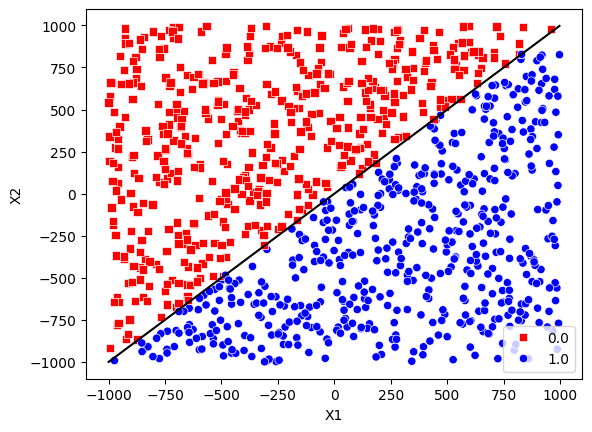

In [ ]:
learning_rate = 0.1
weights_range = (-0.5, 0.5)

df = Dataframe('dataAll.txt')
neuron = Perceptron(learning_rate=learning_rate, weights_range=weights_range)
print('Valor Inicial dos pesos: {}\n'.format(list(neuron.weights)))

history = neuron.solve(df)

printHistory(history)

fig, ax = plt.subplots()
plot(ax, df, neuron)
plt.show()

# Parte II – Experimentação

Nesse bloco de código, realizamos a experimentação com o arquivo "data2.txt", como solicitado nas especificações do trabalho.

São realizados vários experimentos, considerando iterações entre os valores de _learning_rate_ iguais a 0.4, 0.1 e 0.01 e de _weights_ranges_ iguais  -100 até 100 e -0.5 até 0.5. Além disso, são apresentados os resultados de forma visual nos 6 gráficos referentes a cada permutação dos valores de _learning_rate_ e _weight_ranges_.

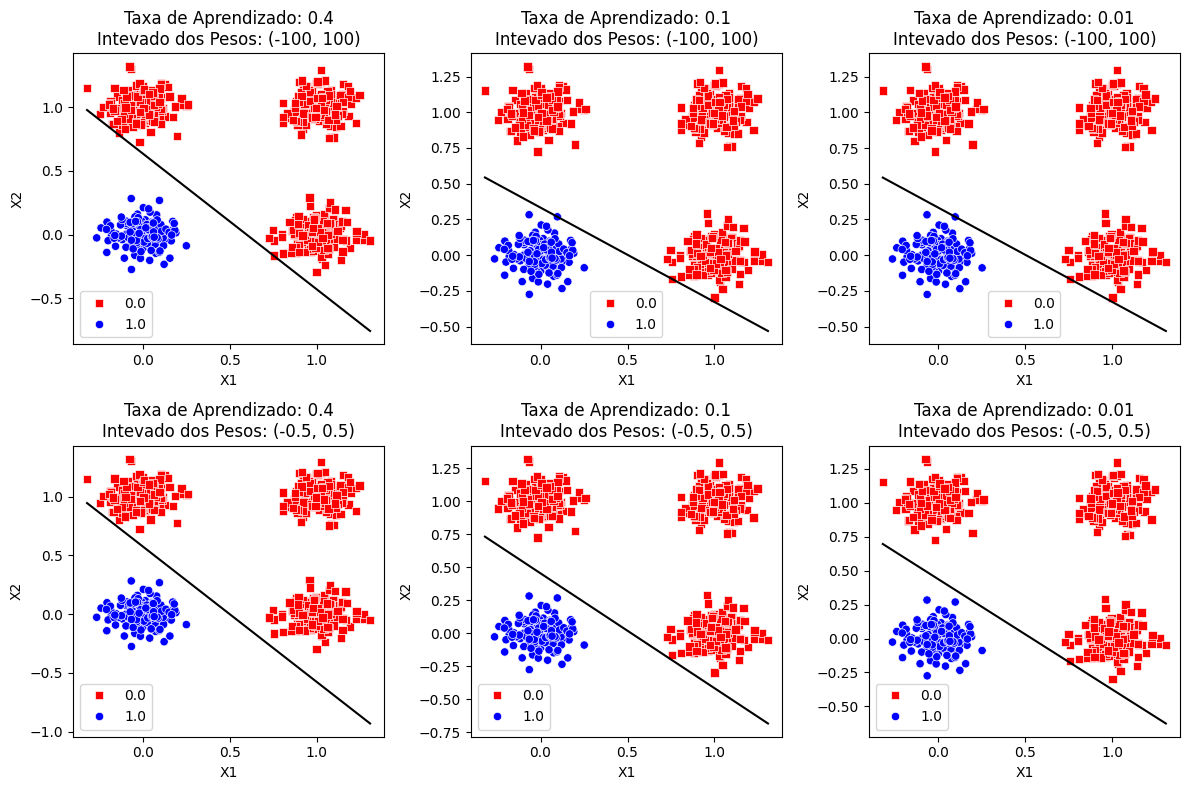

In [ ]:
learning_rates = (0.4, 0.1, 0.01)
weights_ranges = ((-100, 100), (-0.5, 0.5))
experiments = 10

df = Dataframe('data2.txt')

fig, axs = plt.subplots(2,3, figsize=(12,8))

arquivo = open('results.csv', 'w')
arquivo.write('experimento,learning_rate,weights_range_min,weights_range_max,total_updates,total_epochs\n')


for i, wrange in enumerate(weights_ranges):
    for j, lrate in enumerate(learning_rates):
        for e in range(experiments):
            neuron = Perceptron(learning_rate=lrate, weights_range=wrange)
            history = neuron.solve(df)

            arquivo.write('{},{},{},{},{},{}\n'.format(e, lrate, wrange[0], wrange[1], sum(history), len(history)))

            if e == 0:
                plot(axs[i, j], df, neuron)
                axs[i, j].set_title('Taxa de Aprendizado: {}\nIntevado dos Pesos: {}'.format(lrate, wrange))

arquivo.close()

plt.tight_layout()
plt.show()

In [ ]:
printTable('results.csv')

+---------------------+--------------------+-----------------------+------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de Ajustes | Menor número de épocas |
+---------------------+--------------------+-----------------------+------------------------+
|       η = 0.4       |  (-100.0, 100.0)   |    295.30 ± 179.74    |           4            |
|       η = 0.1       |  (-100.0, 100.0)   |   1736.90 ± 1072.01   |           19           |
|       η = 0.01      |  (-100.0, 100.0)   |   15421.20 ± 7636.34  |           49           |
|       η = 0.4       |    (-0.5, 0.5)     |      10.40 ± 5.75     |           2            |
|       η = 0.1       |    (-0.5, 0.5)     |     15.60 ± 10.87     |           2            |
|       η = 0.01      |    (-0.5, 0.5)     |     76.70 ± 45.14     |           2            |
+---------------------+--------------------+-----------------------+------------------------+


# Resultados Parte II

Baseado dos resultados encontrados nos experimentos, pôde-se obter as seguintes conclusões quanto aos parâmentros empregados para o treinamento deste conjunto de dados:


*   Observou-se que os neurônios inicializados com pesos no intervalo de (-100,
 +100) apresentaram uma perfomance muito pior quando comparados aos que utilizaram o intervalo entre (-0.5, +0.5), visto que foi necessária uma quantidade muito maior de ajustes e de épocas para encontrarem a solução.
*   Nota-se também que, para ambos os intervalos, as taxas de aprendizado apresentaram melhor perfomance, pois permitiam ajustes maiores. Isso possibilitou encontrar a solução com menor número de ajustes.
*   Dessa forma, é possível afirmar que os melhores parâmetros encontrados para este problema consistem em um intervalo de pesos de (-0.5, +0.5) e uma taxa de aprendizado 0.4.






# Parte III – Validação Holdout em Problema Não-Linearmente Separável

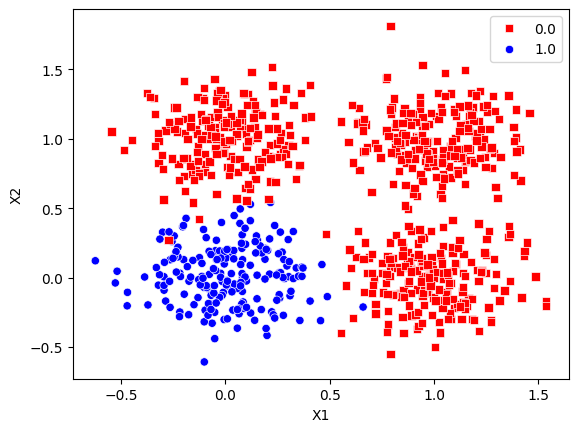

In [ ]:
df = Dataframe('dataHoldout.txt')

fig, ax = plt.subplots()
plot(ax, df)
plt.show()

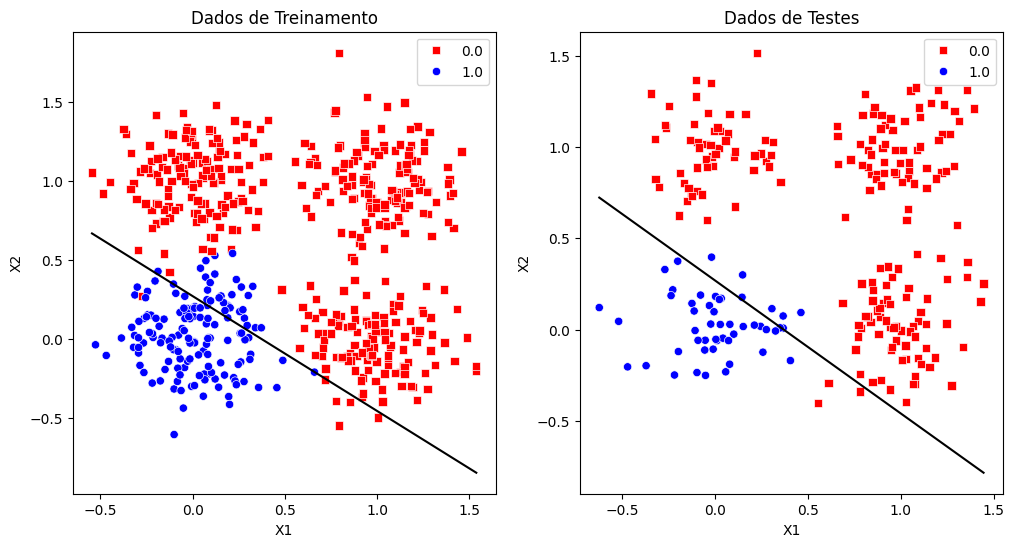

In [ ]:
df_train, df_test = train_test_split(df, 0.7)

learning_rate = 0.1
weights_range = (-0.5, 0.5)

neuron = Perceptron(learning_rate=learning_rate, weights_range=weights_range)
neuron.fit(df_train, 100)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot(axs[0], df_train, neuron)
axs[0].set_title('Dados de Treinamento')

plot(axs[1], df_test, neuron)
axs[1].set_title('Dados de Testes')

plt.show()

Acurácia: 0.9583333333333334
Precisão: 0.9578477513820409
Revocação: 0.9583333333333334
F1-Score: 0.9576822916666666



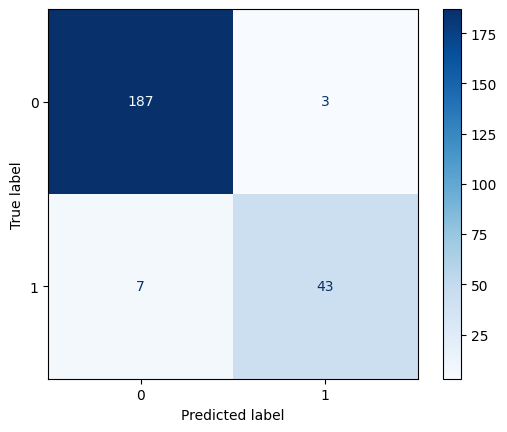

In [ ]:
metrics = neuron.metrics(df_test)

print('Acurácia:', metrics['accuracy'])
print('Precisão:', metrics['precision'])
print('Revocação:', metrics['recall'])
print('F1-Score:', metrics['F1'])
print()

ConfusionMatrixDisplay(metrics['confusionMatrix']).plot(cmap="Blues")

# Resultados da Parte III

Baseado nas métricas obtidas pelo modelo nos dados de teste, pode-se afirmar que a solução alcançada se mostrou muito satisfatória, visto que chegou muito perto de conseguir a solução ótima para o problema. O modelo exibe capacidade em classificar corretamente a maioria das instâncias do conjunto de testes, evidenciando uma combinação favorável entre precisão e revocação.